In [226]:
# Importing libraires

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [16]:
# Loading the datasheet

In [261]:
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [17]:
# Exploratory Data Analysis and Cleaning

In [262]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [134]:
df.shape

(119390, 36)

In [77]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119389 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  int64         
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  object        
 5   arrival_date_week_number        119389 non-null  int64         
 6   arrival_date_day_of_month       119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  children                        119385 non-null  float64     

In [345]:
 df['reservation_status_date'] = pd.to_datetime( df['reservation_status_date'])

In [179]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897
unique,2,12,5,177,7,5,10,12,3,4,3,81233,115424,118897,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************3627
freq,79301,13852,91862,48585,56402,97729,85600,73862,104163,89173,74745,48,6,1,28


In [347]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
market_segment
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
--------------------------------------------------
distribution_channel
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
--------------------------------------------------
reserved_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
--------------------------------------------------
assigned_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
--------------------------------------------------
deposit_type
['No Deposit' 'Refundable' 'Non Refund']
--------------------------------------------------
customer_type
['

In [263]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [278]:
df.drop(['name','email','phone-number','credit_card'], axis = 1, inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [348]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [279]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


<Axes: >

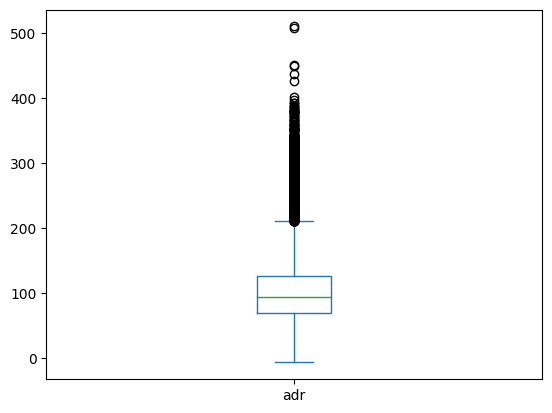

In [280]:
df['adr'].plot(kind = 'box')

In [272]:
df = df[df['adr']<5000]

In [145]:
# Data Analysis and Visualizations

is_canceled
0    0.629589
1    0.370411
Name: proportion, dtype: float64


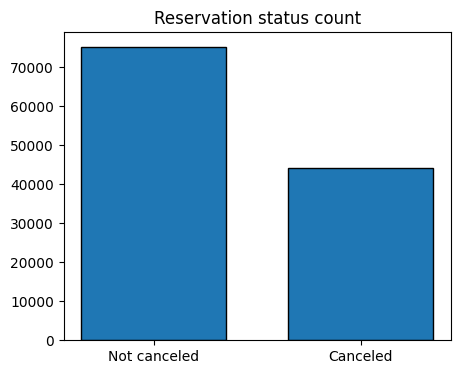

In [349]:
canceled_perc = df['is_canceled'].value_counts(normalize = True)
print(canceled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k' , width = 0.7)
plt.show()


In [350]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel' , hue = ' is_canceled' , data = df, palette = 'Blues')
legend_labels,_= ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation status in different hotels' , fontsize = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservation')
plt.show()

ValueError: Could not interpret value ` is_canceled` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x400 with 0 Axes>

In [277]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [235]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [237]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

AttributeError: Text.set() got an unexpected keyword argument 'fortsize'

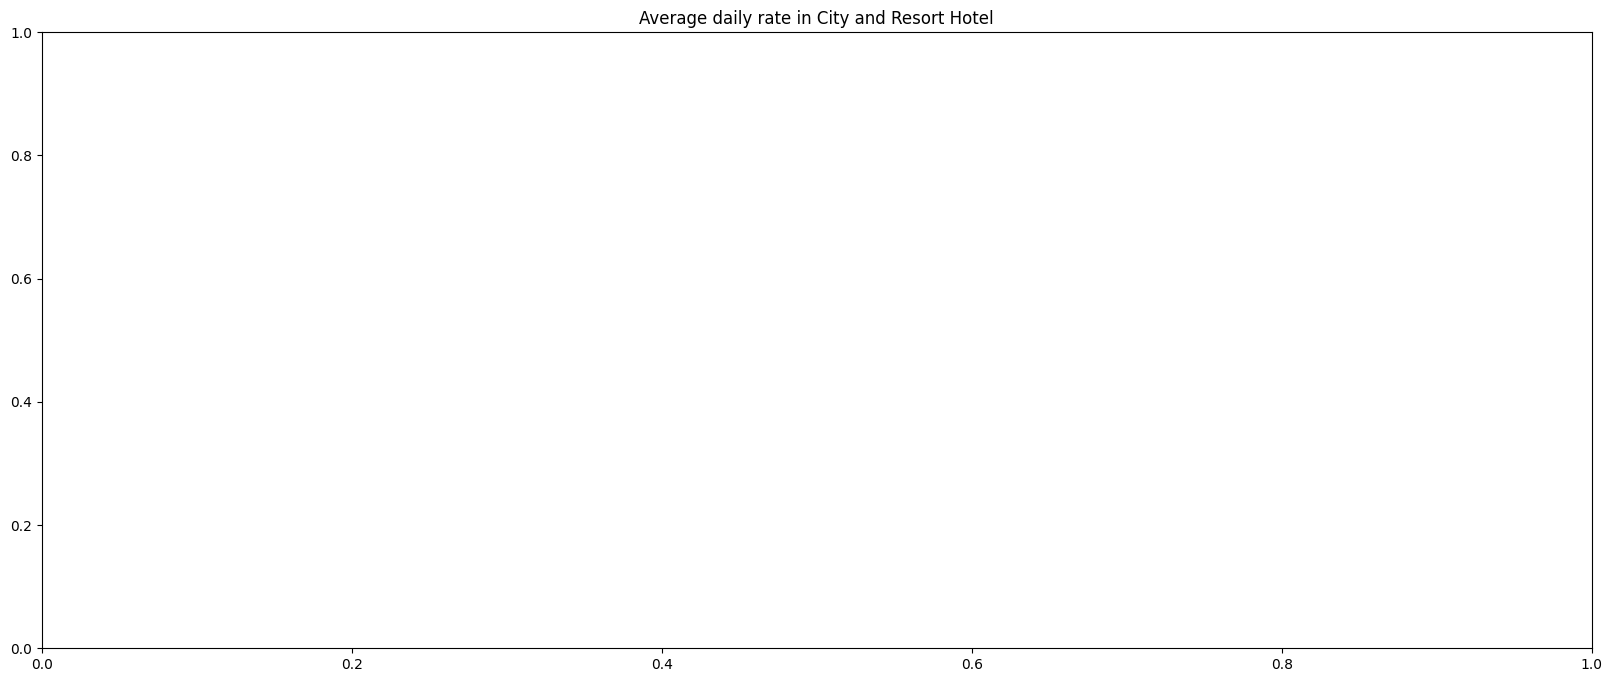

In [284]:
plt.figure(figsize = (20,8))
plt.title('Average daily rate in City and Resort Hotel' , fortsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'] , label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'] , label = 'Cityt Hotel')
plt.legend(fontsize = 20)
plt.show()

In [260]:
df['month'] = df['reservation_status_date'].df.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue 'is_canceled', data = df , palette = 'bright')
legend_labels,_=ax1. get_legend_handles_lables()
ax1.legend(bbox_to_anchor = (1,1))
plt.xlabel('month')
plt.ylabel('number of reservation')
plt.legent(['not canceled','canceled'])
plt.show()

SyntaxError: positional argument follows keyword argument (2917289586.py, line 3)

KeyError: 'month'

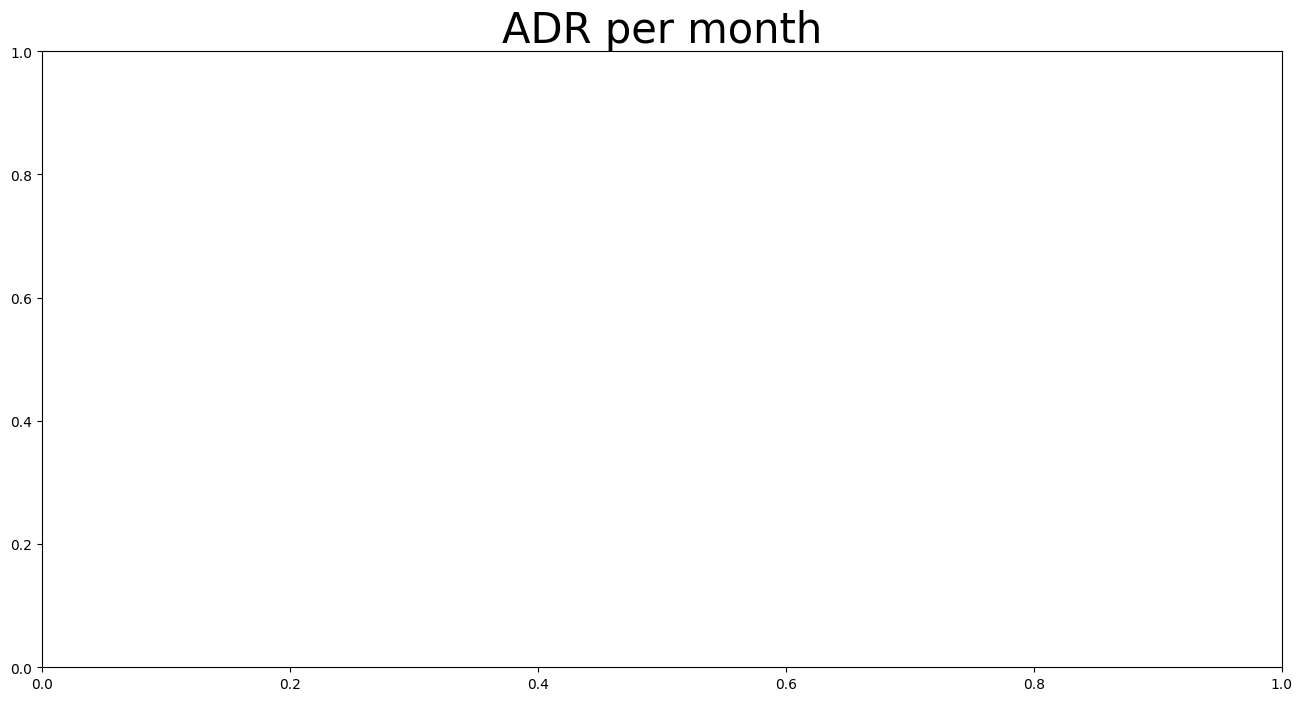

In [352]:
plt.figure(figsize = (16,8))
plt.title('ADR per month' , fontsize = 30)
sns.barplot('month' , 'adr' , data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show

In [342]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:18]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_18_country, autopct = '%.2f', labels = top_10_country.index)
plt.show() 

KeyError: 'country'

In [324]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24218
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [326]:
 df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.473050
Offline TA/TO    0.202850
Groups           0.165937
Direct           0.105588
Corporate        0.044351
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [328]:
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.468964
Groups           0.273545
Offline TA/TO    0.187911
Direct           0.043733
Corporate        0.022432
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

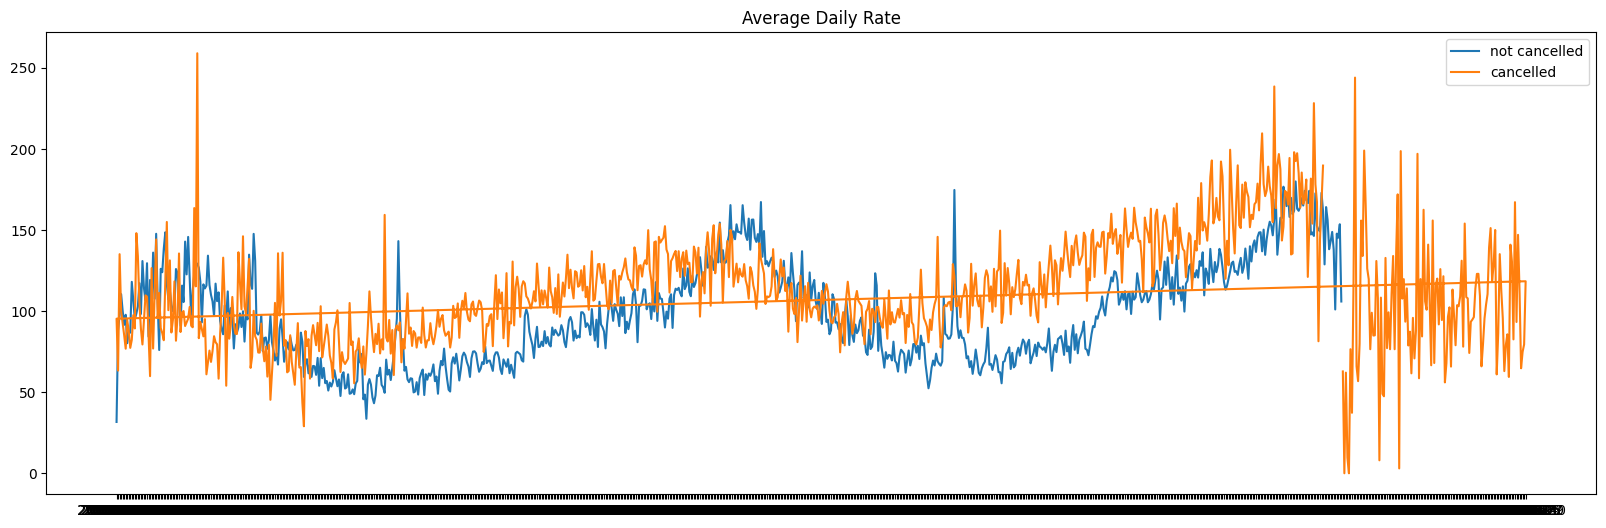

In [343]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean() 
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True) 

not_cancelled_data = df[df['is_canceled'] == 0] 
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean() 
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True) 

plt.figure(figsize = (20,6) )
plt.title('Average Daily Rate') 
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled') 
plt.legend() 

In [ ]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservatiom_status_date']<'2017')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservatiom_status_date']<'2017')]

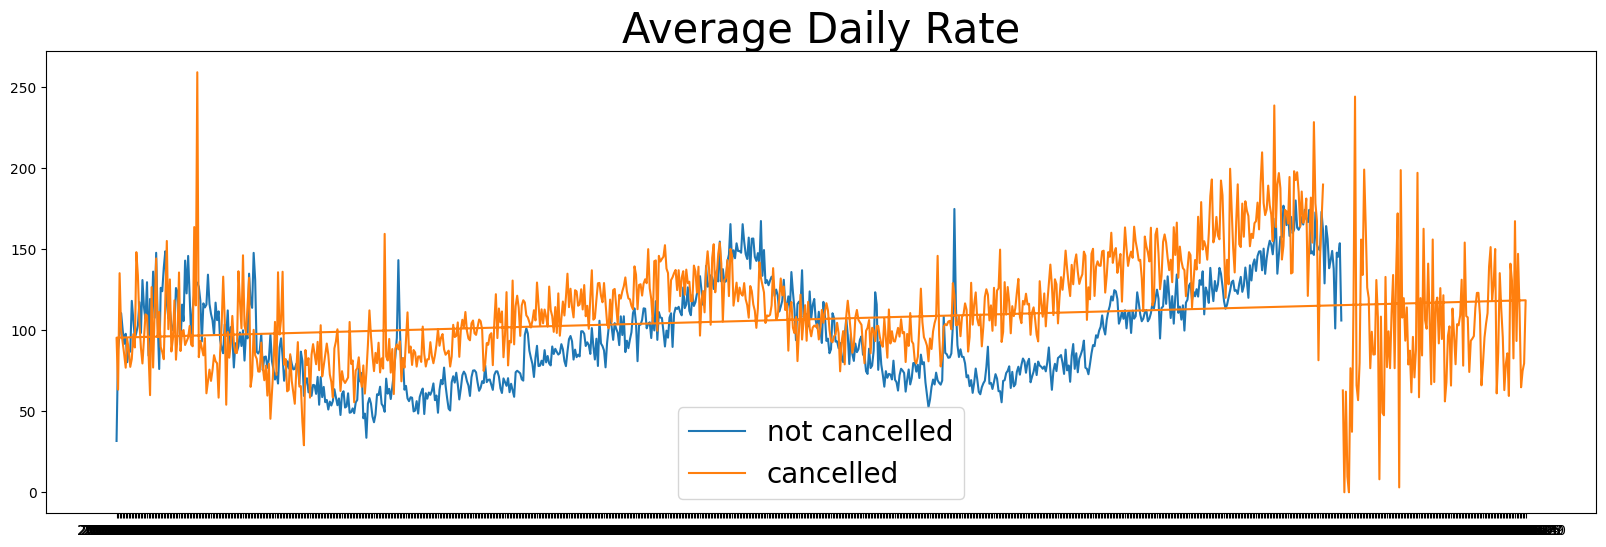

In [356]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate' , fontsize = 30) 
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled') 
plt.legend(fontsize = 20) 
plt.show()